In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno

In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/startup_funding.csv')
df.head(5)

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [ ]:
no_rows = df.shape[0]
no_cols = df.shape[1]
total_cells = no_rows * no_cols
missing_cells = df.isnull().sum().sum()

print(f"Number of rows: {no_rows}")
print(f"Number of columns: {no_cols}")

missing_percentage = (missing_cells / total_cells) * 100
print(f"Missing cells in percentage: {missing_percentage:.2f}%")


Number of rows: 2372
Number of columns: 10
Missing cells in percentage: 17.26%


### Complete Data:
The columns **"SNo," "Date," "StartupName," "InvestorsName," "InvestmentType," and "Location"** have no missing values (with **2372** complete entries).

### Partial Missing Data:
- The **"SubVertical"** column has some missing data with **1436** complete entries.
- **"AmountInUSD"** shows a significant portion of missing values, with only **1525** complete entries.

### Major Missing Data:
The **"Remarks"** column has substantial missing data, with only **419** complete entries out of 2372 total.


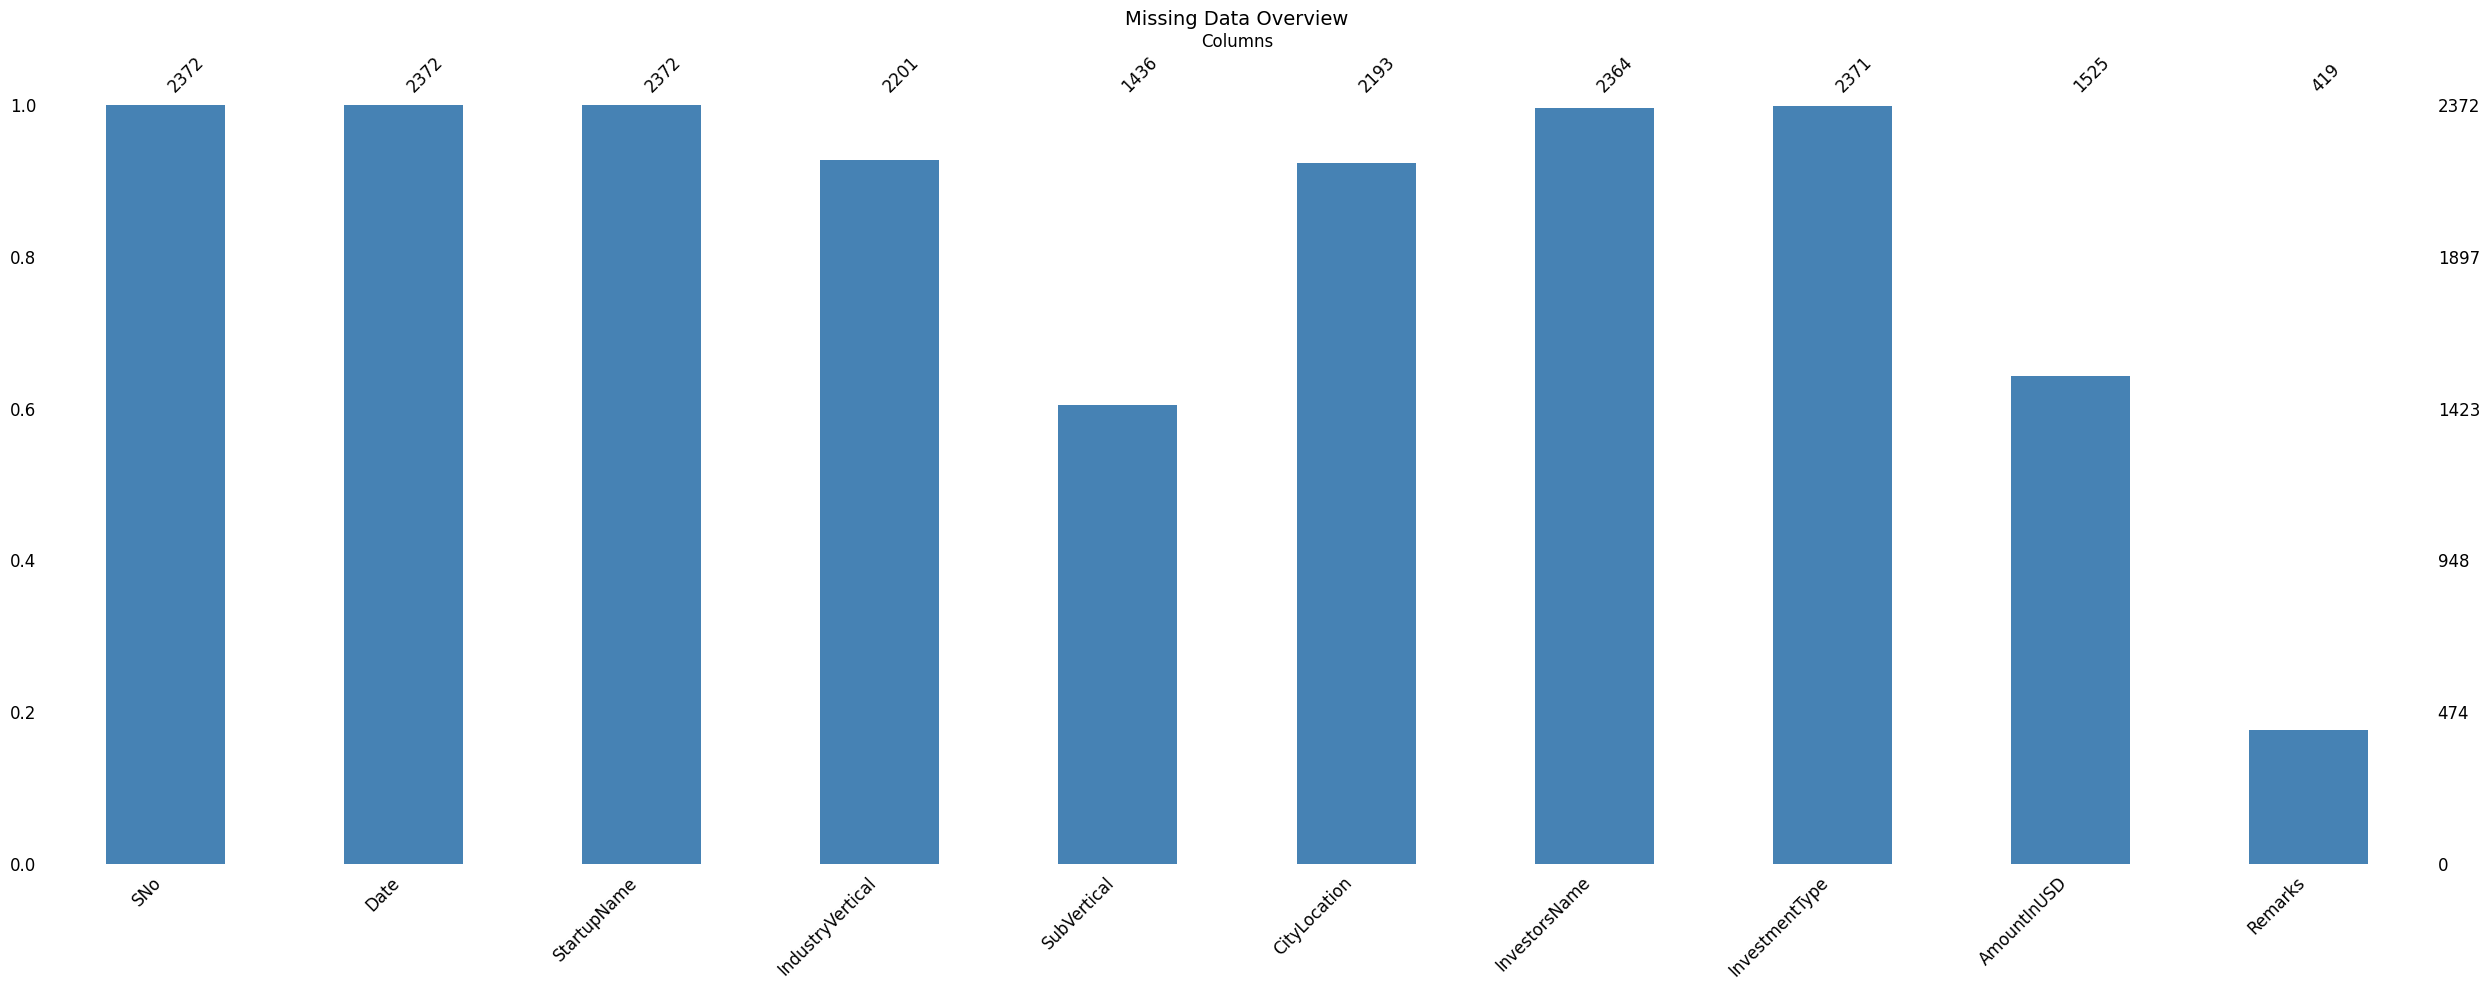

In [ ]:
plt.figure(figsize=(12, 6))
msno.bar(df, color='steelblue', fontsize=12)
plt.title('Missing Data Overview', fontsize=14)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Missing Values', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### **Bar Plot with sorted order of missing values**

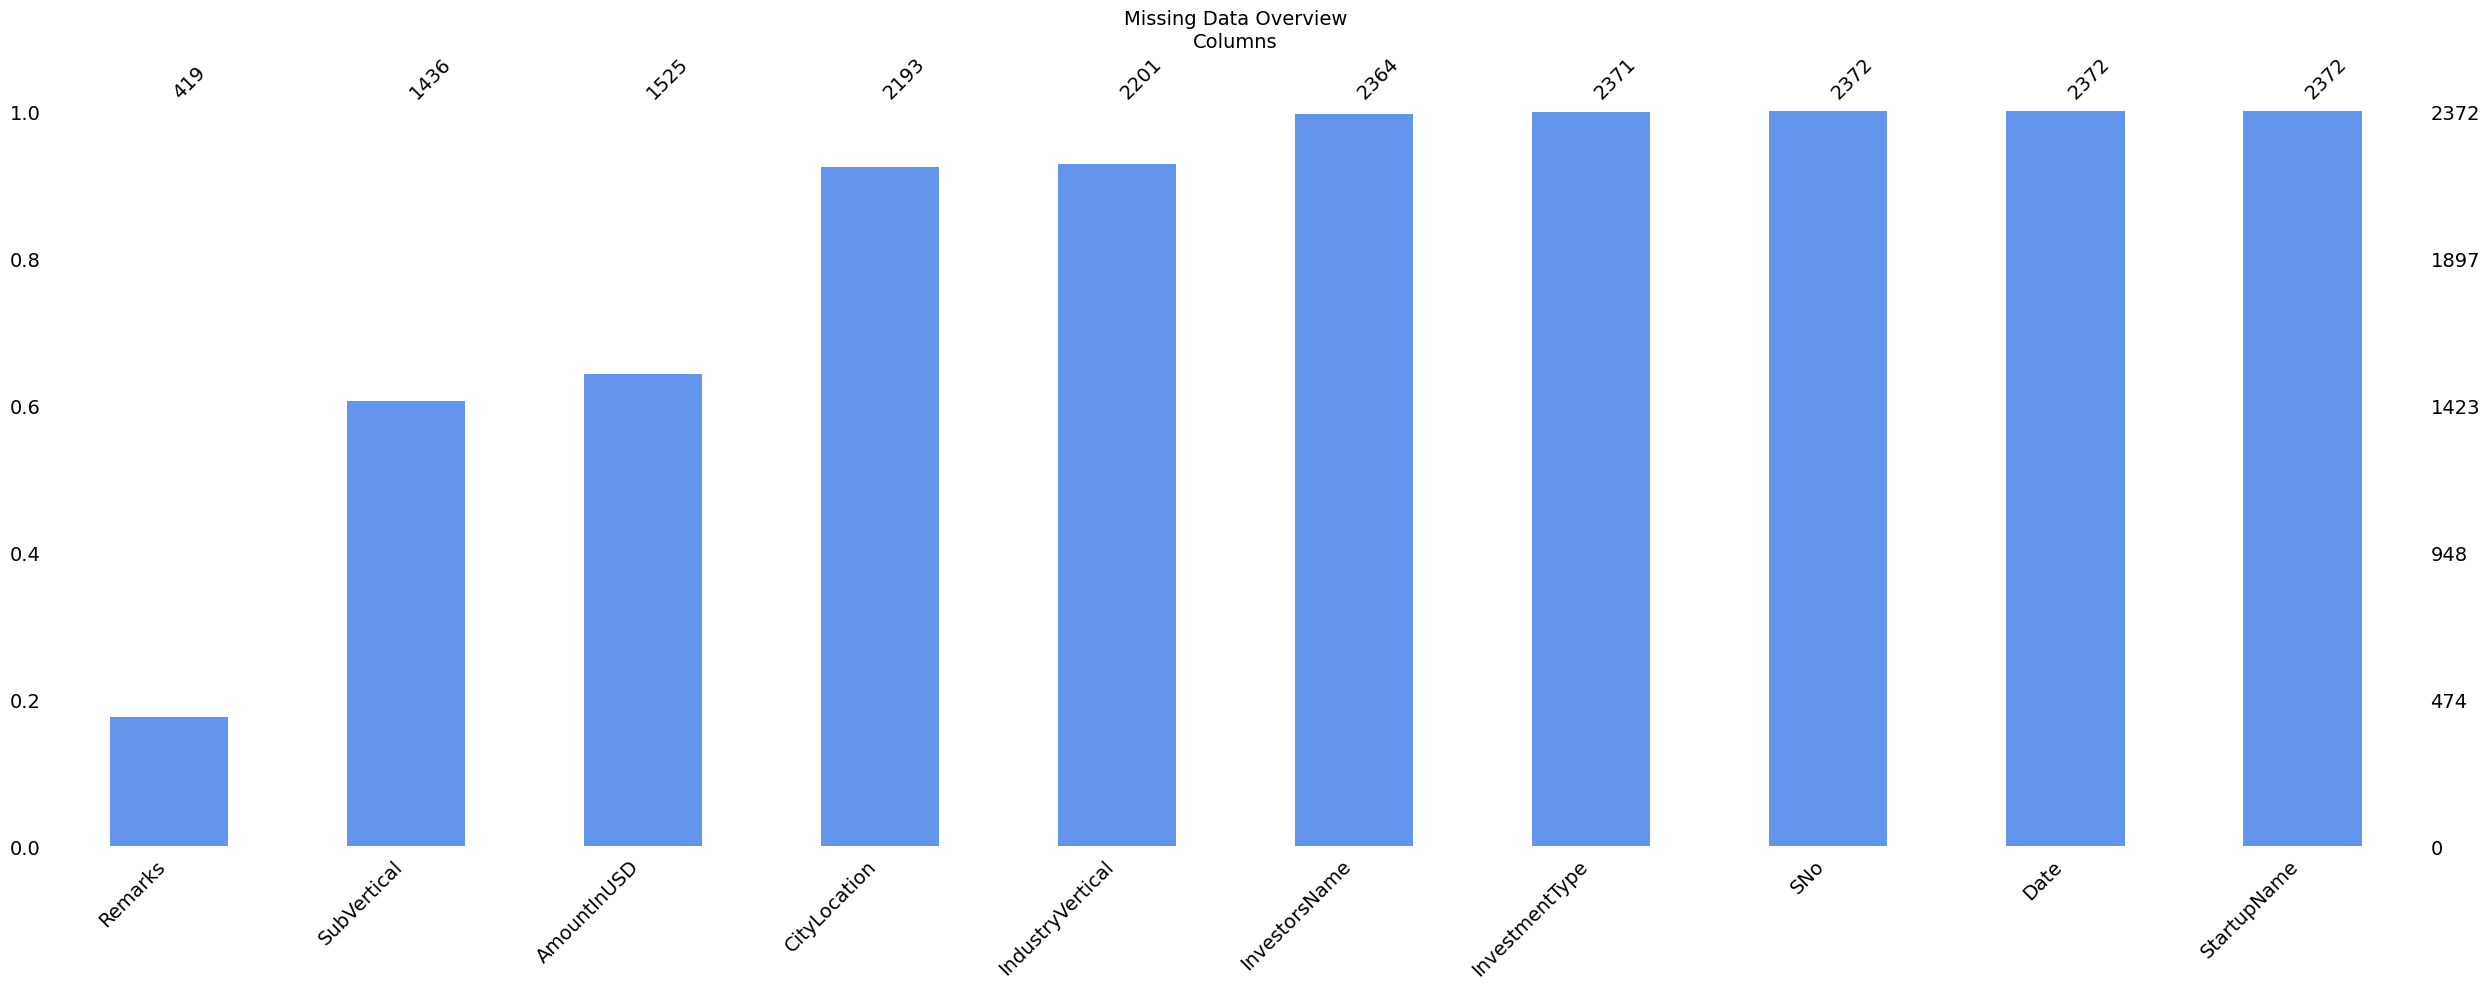

In [ ]:
plt.figure(figsize=(8, 3))
msno.bar(df, sort='ascending', color='cornflowerblue', fontsize=14)
plt.title('Missing Data Overview', fontsize=14)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Missing Values', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Missing Data Matrix Plot Analysis

- **Fully Black Columns**: The columns like `SNo`, `Date`, `StartupName`, `IndustryVertical`, `InvestorsName`, `InvestmentType`, and `Remarks` are fully black, indicating no missing values in these columns.
- **Partially Black and White Columns**: Columns such as `SubVertical`, `CityLocation`, and `AmountInUSD` have a mix of black and white lines. White lines indicate missing data, so these columns have a significant amount of missing values.
- **Rows on the Y-axis**: The y-axis represents the number of rows (2372), and the presence of white areas in the matrix indicates missing data across rows. These missing data points appear scattered.

#### Conclusion:
- Some columns (e.g., `SubVertical`, `CityLocation`, `AmountInUSD`) have substantial missing data, while others (e.g., `SNo`, `Date`, `StartupName`) are complete.
- The missing data pattern seems non-sequential, as the missing values are scattered throughout different rows and columns.


<Figure size 1200x600 with 0 Axes>

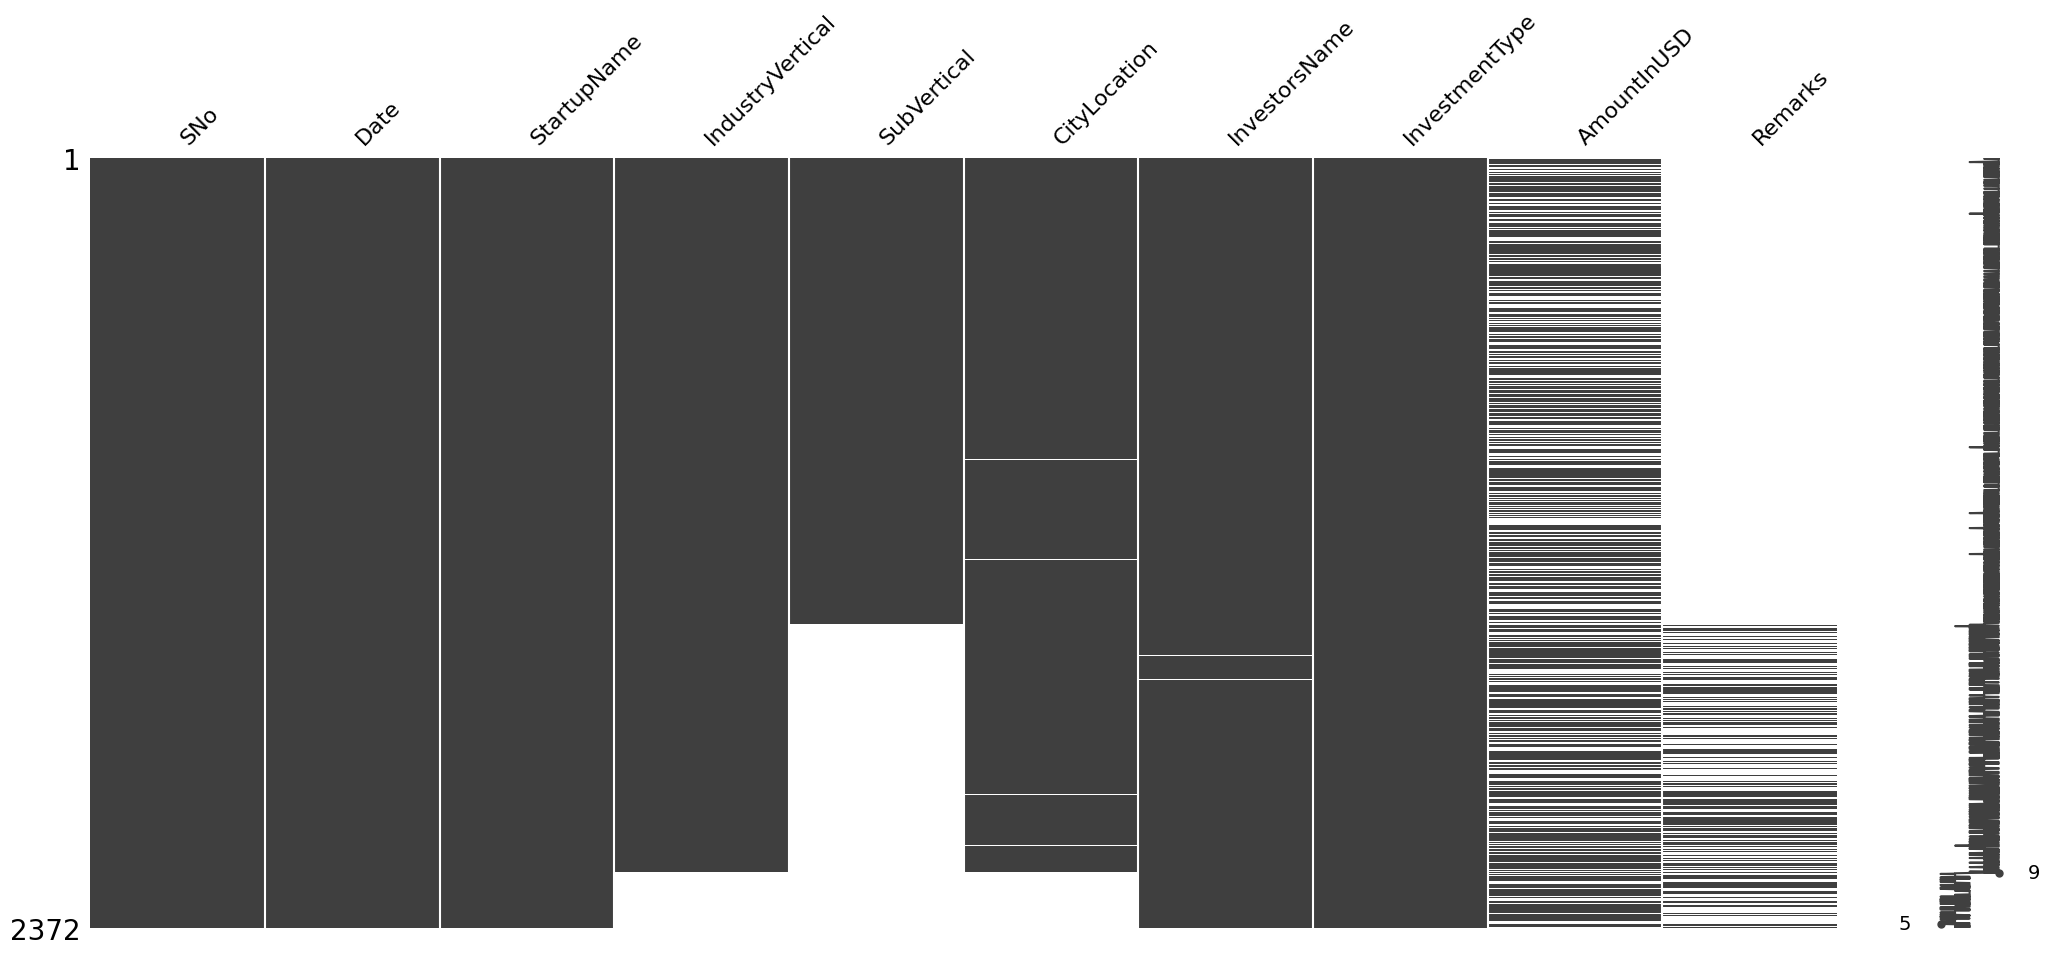

In [ ]:
plt.figure(figsize=(12,6))
msno.matrix(df)
plt.show()

### Interpretation of the Heatmap:

- **CityLocation**, **InvestorsName**, and **InvestmentType** show minimal missing data, indicated by values close to 0. This suggests that the majority of data points in these columns are complete.
- **IndustryVertical** and **SubVertical** have more significant missing data, with **SubVertical** having the highest proportion of missing values (closer to 0.3) and **IndustryVertical** having less (closer to 0.1).
- **AmountInUSD** and **Remarks** columns appear to have almost no missing data, represented by the dark green color, which corresponds to negative or low values.

### Conclusion:

- **IndustryVertical** and **SubVertical** have the most missing entries and may require special attention for imputation or removal.
- **CityLocation**, **InvestorsName**, and **InvestmentType** show some missing values but are mostly complete.
- **AmountInUSD** and **Remarks** are almost fully populated and require minimal to no attention in terms of missing data.



<Figure size 1000x500 with 0 Axes>

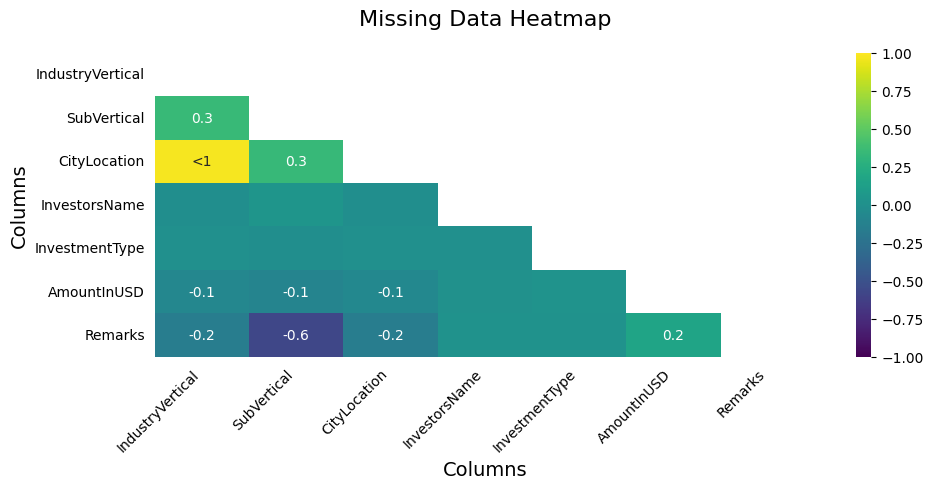

In [ ]:
plt.figure(figsize=(10,5))
msno.heatmap(df, cmap="viridis", cbar=True, fontsize=12, figsize=(10 ,5), labels=True)
plt.title('Missing Data Heatmap', fontsize=16, pad=20)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Columns', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

### Key Observations:
#### Cluster Groups:
- **`AmountInUSD`**, **`SubVertical`**, and **`Remarks`** are clustered closely together, indicating similar missing data patterns.
- **`SNo`**, **`StartupName`**, **`InvestmentType`**, **`InvestorsName`**, and **`CityLocation`** are also clustered together, showing another group with similar patterns.
- **`Date`** is slightly isolated but still relatively close to the first group.

#### Interpretation of Height:
- The height of connections between columns (measured by "distance" on the y-axis) represents the difference in their missing data patterns. For example, **`AmountInUSD`** and **`SubVertical`** are joined at a low height, showing very similar patterns. **`IndustryVertical`**, however, is connected at a higher distance, indicating a distinct missing data pattern.

### Conclusion:
- **Groupings of Missing Data**: Columns like **`AmountInUSD`**, **`SubVertical`**, and **`Remarks`** share similar missing data patterns, meaning that if one is missing, the others are likely missing as well. Similarly, **`SNo`**, **`StartupName`**, **`InvestmentType`**, **`InvestorsName`**, and **`CityLocation`** also exhibit a shared missing data pattern.
- **Unique Columns**: **`IndustryVertical`** shows a distinct missing data pattern, less correlated with other columns.


<Figure size 1000x500 with 0 Axes>

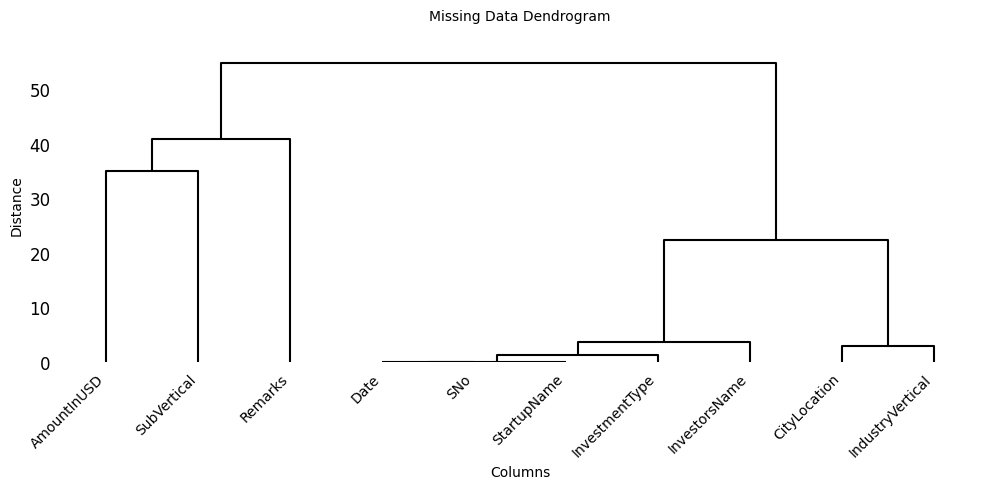

In [ ]:

plt.figure(figsize=(10,5))
msno.dendrogram(df, method='ward', orientation='top', fontsize=10 , figsize=(10,5))
plt.title('Missing Data Dendrogram', fontsize=10, pad=20)
plt.xlabel('Columns', fontsize=10)
plt.ylabel('Distance', fontsize=10)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()